<a href="https://colab.research.google.com/github/haolengoc/AI-Project/blob/ANN/5_assignments_of_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DỰ ĐOÁN HOA**

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lngcho","key":"ce0e73445d21af810def5e2d595a7d5a"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d alxmamaev/flowers-recognition
!unzip flowers-recognition.zip -d flowers_dataset

Dataset URL: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
License(s): unknown
Archive:  flowers-recognition.zip
  inflating: flowers_dataset/flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers_dataset/flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers_dataset/flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers_dataset/flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers_dataset/flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers_dataset/flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers_dataset/flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers_dataset/flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers_dataset/flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers_dataset/flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers_dataset/flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers_dataset/flowers/daisy/10437929963_bc13eebe0c.jpg 

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

IMAGE_SIZE = 64
DATA_DIR = '/content/flowers_dataset/flowers'

X = []
y = []
class_names = sorted(os.listdir(DATA_DIR))

for label, flower in enumerate(class_names):
    folder = os.path.join(DATA_DIR, flower)
    for file in os.listdir(folder):
            img_path = os.path.join(folder, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
            img = img.astype('float32') / 255.0
            X.append(img.flatten())
            y.append(label)

X = np.array(X)
y = to_categorical(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(IMAGE_SIZE * IMAGE_SIZE,)),
    Dense(256, activation='relu'),
    Dense(len(class_names), activation='softmax')])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32,
                    validation_data=(x_test, y_test))

Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3925 - loss: 1.3964 - val_accuracy: 0.2130 - val_loss: 1.6139
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3893 - loss: 1.4240 - val_accuracy: 0.3171 - val_loss: 1.6505
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4520 - loss: 1.3370 - val_accuracy: 0.2801 - val_loss: 1.6802
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4198 - loss: 1.3582 - val_accuracy: 0.3044 - val_loss: 1.5965
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4505 - loss: 1.3066 - val_accuracy: 0.2940 - val_loss: 1.6289
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4987 - loss: 1.2395 - val_accuracy: 0.2998 - val_loss: 1.6402
Epoch 7/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4985 - loss: 1.2253 - val_accuracy: 0.3299 - val_loss: 1.6315
Epoch 8/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4916 - loss: 1.2349 - val_accu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


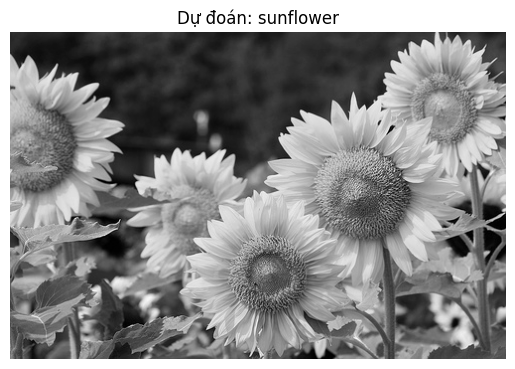

Dự đoán ảnh là: sunflower


In [ ]:
import matplotlib.pyplot as plt

def predict_flower(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    img_norm = img_resized.astype('float32') / 255.0
    img_flat = img_norm.flatten().reshape(1, -1)

    prediction = model.predict(img_flat)
    predicted_label = np.argmax(prediction)
    flower_name = class_names[predicted_label]


    plt.imshow(img, cmap='gray')
    plt.title(f'Dự đoán: {flower_name}')
    plt.axis('off')
    plt.show()
    print(f'Dự đoán ảnh là: {flower_name}')

predict_flower('/content/flowers_dataset/flowers/sunflower/1008566138_6927679c8a.jpg')

In [ ]:
model.save('flowers_model.h5')

**DỰ ĐOÁN TIỀN TỆ VIỆT NAM**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving vn-currency.zip to vn-currency.zip


In [ ]:
import zipfile

with zipfile.ZipFile("vn-currency.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


IMAGE_SIZE = 64
DATA_DIR = '/content/dataset/archive (1)/dataset'

X = []
y = []
class_names = sorted(os.listdir(DATA_DIR))

for label, currency in enumerate(class_names):
    folder = os.path.join(DATA_DIR, currency)
    for file in os.listdir(folder):
            img_path = os.path.join(folder, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
            img = img.astype('float32') / 255.0
            X.append(img.flatten())
            y.append(label)


X = np.array(X)
y = to_categorical(y)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [ ]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(IMAGE_SIZE*IMAGE_SIZE,)),
    Dense(256, activation='relu'),
    Dense(len(class_names), activation='softmax')])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,231,819 (8.51 MB)

 Trainable params: 2,231,819 (8.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32,
                    validation_data=(x_test, y_test))

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4064 - loss: 1.6175 - val_accuracy: 0.3813 - val_loss: 1.6621
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4285 - loss: 1.5290 - val_accuracy: 0.4422 - val_loss: 1.5736
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4765 - loss: 1.4259 - val_accuracy: 0.4239 - val_loss: 1.6299
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5223 - loss: 1.3522 - val_accuracy: 0.4402 - val_loss: 1.5306
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5448 - loss: 1.2748 - val_accuracy: 0.4767 - val_loss: 1.4271
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5629 - loss: 1.2223 - val_accuracy: 0.4625 - val_loss: 1.5150
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5325 - loss: 1.2406 - val_accuracy: 0.4584 - val_loss: 1.4909
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5684 - loss: 1.1514 - val_accuracy: 0.4767 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


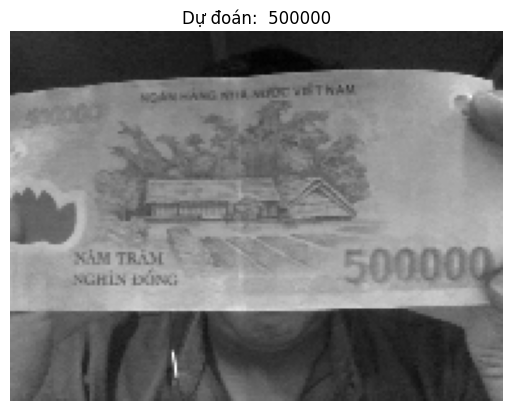

Dự đoán mệnh giá là:  500000


In [ ]:
import matplotlib.pyplot as plt

def predict_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    img_norm = img_resized.astype('float32') / 255.0
    img_flat = img_norm.flatten().reshape(1, -1)

    prediction = model.predict(img_flat)
    predicted_label = np.argmax(prediction)
    currency_name = class_names[predicted_label]

    plt.imshow(img, cmap='gray')
    plt.title(f'Dự đoán:  {currency_name}')
    plt.axis('off')
    plt.show()
    print(f'Dự đoán mệnh giá là:  {currency_name}')

predict_image('/content/dataset/archive (1)/dataset/500000/500000_0.png')

In [ ]:
model.save('VNcurrency_model.h5')

**DỰ ĐOÁN TAY NGƯỜI DỰA TRÊN CHỈ TAY**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving palm.zip to palm.zip


In [ ]:
import zipfile

with zipfile.ZipFile("palm.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")  # Dataset giờ nằm trong /content/dataset

In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

IMAGE_SIZE = 64
DATA_DIR = '/content/dataset/palm/palm'

X = []
y = []
class_names = sorted(os.listdir(DATA_DIR))

for label, palm in enumerate(class_names):
    folder = os.path.join(DATA_DIR, palm)
    for file in os.listdir(folder):
            img_path = os.path.join(folder, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
            img = img.astype('float32') / 255.0
            X.append(img.flatten())
            y.append(label)

X = np.array(X)
y = to_categorical(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(IMAGE_SIZE*IMAGE_SIZE,)),
    Dense(256, activation='relu'),
    Dense(len(class_names), activation='softmax')])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,230,277 (8.51 MB)

 Trainable params: 2,230,277 (8.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32,
                    validation_data=(x_test, y_test))

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.0445 - val_accuracy: 0.9500 - val_loss: 0.1791
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0442 - val_accuracy: 0.9500 - val_loss: 0.1869
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0290 - val_accuracy: 0.9500 - val_loss: 0.1663
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0320 - val_accuracy: 0.9500 - val_loss: 0.1753
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0248 - val_accuracy: 0.9750 - val_loss: 0.1583
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0209 - val_accuracy: 0.9750 - val_loss: 0.1576
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0231 - val_accuracy: 0.9500 - val_loss: 0.1786
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0198 - val_accuracy: 0.9750 - val_loss: 0.1453


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


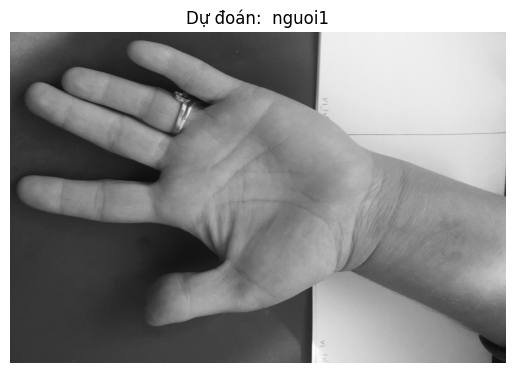

Dự đoán bàn tay của:  nguoi1


In [ ]:
import matplotlib.pyplot as plt

def predict_palm(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    img_norm = img_resized.astype('float32') / 255.0
    img_flat = img_norm.flatten().reshape(1, -1)

    prediction = model.predict(img_flat)
    predicted_label = np.argmax(prediction)
    palm_name = class_names[predicted_label]

    plt.imshow(img, cmap='gray')
    plt.title(f'Dự đoán:  {palm_name}')
    plt.axis('off')
    plt.show()
    print(f'Dự đoán bàn tay của:  {palm_name}')

predict_palm('/content/dataset/palm/palm/nguoi1/002_F_L_30.JPG')

In [ ]:
model.save('palm_model.h5')

**DỰ ĐOÁN MÓN ĂN VIỆT NAM**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving VN_dishes.zip to VN_dishes.zip


In [ ]:
import zipfile

with zipfile.ZipFile("VN_dishes.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

IMAGE_SIZE = 64
DATA_DIR = '/content/dataset/VN_dishes/Images'

X = []
y = []
class_names = sorted(os.listdir(DATA_DIR))

for label, dish in enumerate(class_names):
    folder = os.path.join(DATA_DIR, dish)
    for file in os.listdir(folder):
            img_path = os.path.join(folder, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
            img = img.astype('float32') / 255.0
            X.append(img.flatten())
            y.append(label)

X = np.array(X)
y = to_categorical(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(IMAGE_SIZE*IMAGE_SIZE,)),
    Dense(256, activation='relu'),
    Dense(len(class_names), activation='softmax')])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,230,534 (8.51 MB)

 Trainable params: 2,230,534 (8.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.1968 - loss: 2.6555 - val_accuracy: 0.1602 - val_loss: 1.8521
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2271 - loss: 1.7934 - val_accuracy: 0.2296 - val_loss: 1.7610
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2566 - loss: 1.7415 - val_accuracy: 0.2323 - val_loss: 1.8061
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2825 - loss: 1.7017 - val_accuracy: 0.2283 - val_loss: 1.8000
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2765 - loss: 1.7088 - val_accuracy: 0.2256 - val_loss: 1.8210
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2765 - loss: 1.7057 - val_accuracy: 0.2417 - val_loss: 1.7654
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2657 - loss: 1.7036 - val_accuracy: 0.2470 - val_loss: 1.7541
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2913 - loss: 1.6769 - val_accuracy: 0.2457 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


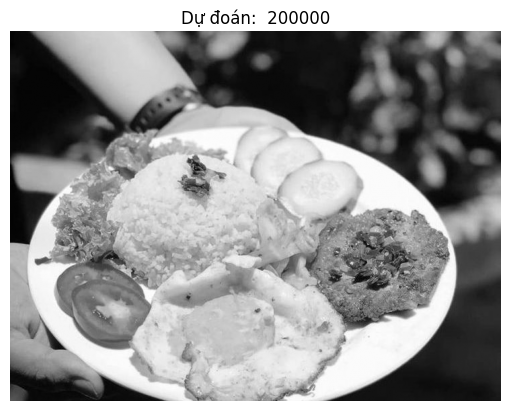

Dự đoán món ăn là:  200000


In [ ]:
import matplotlib.pyplot as plt

def predict_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    img_norm = img_resized.astype('float32') / 255.0
    img_flat = img_norm.flatten().reshape(1, -1)

    prediction = model.predict(img_flat)
    predicted_label = np.argmax(prediction)
    dish_name = class_names[predicted_label]

    plt.imshow(img, cmap='gray')
    plt.title(f'Dự đoán:  {dish_name}')
    plt.axis('off')
    plt.show()
    print(f'Dự đoán món ăn là:  {dish_name}')

predict_image('/content/dataset/VN_dishes/Images/Com_tam/1.jpg')

In [ ]:
model.save('dishes_model.h5')

**DỰ ĐOÁN HÌNH DẠNG KHUÔN MẶT**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving faceshape2.zip to faceshape2.zip


In [ ]:
import zipfile

with zipfile.ZipFile("faceshape2.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

IMAGE_SIZE = 60
DATA_DIR = '/content/dataset/faceshape2'

X = []
y = []
class_names = sorted(os.listdir(DATA_DIR))

for label, faceshape in enumerate(class_names):
    folder = os.path.join(DATA_DIR, faceshape)
    for file in os.listdir(folder):
            img_path = os.path.join(folder, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
            img = img.astype('float32') / 255.0
            X.append(img.flatten())
            y.append(label)

X = np.array(X)
y = to_categorical(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(IMAGE_SIZE*IMAGE_SIZE,)),
    Dense(256, activation='relu'),
    Dense(len(class_names), activation='softmax')])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 512)            │     1,843,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,976,325 (7.54 MB)

 Trainable params: 1,976,325 (7.54 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32,
                    validation_data=(x_test, y_test))

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2269 - loss: 3.8976 - val_accuracy: 0.2000 - val_loss: 2.3160
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2160 - loss: 2.0546 - val_accuracy: 0.2667 - val_loss: 1.9213
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2396 - loss: 1.9250 - val_accuracy: 0.1333 - val_loss: 1.7613
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2521 - loss: 1.6527 - val_accuracy: 0.3333 - val_loss: 1.6857
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4779 - loss: 1.4999 - val_accuracy: 0.3000 - val_loss: 1.5541
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3548 - loss: 1.4370 - val_accuracy: 0.2333 - val_loss: 1.6041
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4117 - loss: 1.4386 - val_accuracy: 0.3667 - val_loss: 1.6215
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5325 - loss: 1.3254 - val_accuracy: 0.2000 - val_loss: 1.6345


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


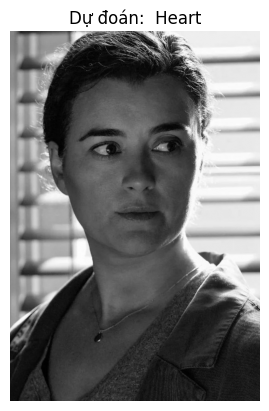

Dự đoán hình dáng của khuôn mặt là:  Heart


In [ ]:
import matplotlib.pyplot as plt

def predict_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    img_norm = img_resized.astype('float32') / 255.0
    img_flat = img_norm.flatten().reshape(1, -1)

    prediction = model.predict(img_flat)
    predicted_label = np.argmax(prediction)
    faceshape_name = class_names[predicted_label]

    plt.imshow(img, cmap='gray')
    plt.title(f'Dự đoán:  {faceshape_name}')
    plt.axis('off')
    plt.show()
    print(f'Dự đoán hình dáng của khuôn mặt là:  {faceshape_name}')

predict_image('/content/dataset/faceshape2/Heart/1.jpg')

In [ ]:
model.save('faceshape_model.h5')